# **ANALIZA PODATKOV**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

hribi = pd.read_csv('obdelani_podatki/hribi.csv')

In [2]:
hribi

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis,blok_poti
0,Snežnik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1796,"vrh, koča",851397,99,12,Snežnik oz. Veliki Snežnik je z višino 1796 m ...,NaN
1,Mali Snežnik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1694,vrh,431337,83,4,Mali Snežnik je vrh na zahodnem grebenu Snežni...,NaN
2,Mali Golak,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1495,vrh,637569,97,5,Mali Golak je najvišji od Golakov. Imena ni do...,NaN
3,Srednji Golak,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1480,vrh,399136,79,3,Srednji Golak se nahaja med Malim in Velikim G...,NaN
4,Mrzovec,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1410,vrh,414632,81,5,Mrzovec je najizrazitejši vrh v osrčju Trnovsk...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2188,Blaguško jezero,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",220,jezero,749,16,2,"Blaguško jezero je jezero umetnega nastanka, k...",NaN
2189,Lisjakova struga,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",206,koča,170,7,1,"Lisjakova struga je bil nekoč rokav reke Mure,...",NaN
2190,Babičev mlin na Muri,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",182,NaN,1453,21,2,Babičev mlin na Muri se nahaja le kakih 100 me...,NaN
2191,Brod na Muri (Melinci),Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",175,NaN,196546,55,1,"Brod v Melincih je eden od štirih brodov, ki š...",NaN


Bloka poti v tabeli **hribi** ne potrebujemo več, saj imamo ločeno tabelo s potmi, v kateri je za vsako pot naveden tudi vrh.

In [3]:
del hribi['blok_poti']

In [4]:
poti = pd.read_csv('obdelani_podatki/poti.csv')
poti

,ime_poti,cas_poti,tezavnost_poti,vrh
0,Sviščaki - Snežnik (peš pot),120,lahka označena pot,Snežnik
1,Kapetanova bajta - Snežnik,55,lahka označena pot,Snežnik
2,Leskova dolina - Snežnik,195,lahka označena pot,Snežnik
3,Snežniška Grda jama - Snežnik (čez Mali Snežnik),85,lahka označena pot,Snežnik
4,Gašperjev hrib - Snežnik,90,lahka označena pot,Snežnik
...,...,...,...,...
6959,Veržej - Babičev mlin na Muri,20,lahka označena pot,Babičev mlin na Muri
6960,Beltinci - Babičev mlin na Muri,95,lahka označena pot,Babičev mlin na Muri
6961,Mota - Brod na Muri (Melinci) (od mrtvic do reke),45,lahka označena pot,Brod na Muri (Melinci)
6962,Razkrižje - Razkriški kot (sotočje Mure in Šča...,75,lahka označena pot,Razkriški kot (sotočje Mure in Ščavnice)


In [5]:
st_hribov = hribi['ime'].count()
st_hribov

2193

Iz spletne strani hribi.net smo zajeli 2193 elementov. Od tega niso vsi vrhovi gora in hribov, temveč so zajeta tudi različna jezera, koče in druge postojanke, do katerih vodijo označene in neoznačene poti.

In [6]:
st_vseh_poti = poti['ime_poti'].count()
st_vseh_poti

6964

Vseh različnih poti do prej omenjenih točk, smo zajeli 6964. Za vsako imamo poleg imena, ki v večini primerov vsebuje tudi podatek o izhodišču in cilju, še čas hoje, težavnost poti in dodaten podatek o vrhu (ta je bil dodan za vsak primer, če ne bi bil viden že v imenu).

Za začetek iz tabele **hribi** izločimo samo vrhove gora in hribov, ter jih razvrstimo po priljubljenosti.

In [7]:
tabela_vrhov = hribi[hribi.vrsta >= 'vrh']
vrhovi_po_priljubljenosti = tabela_vrhov.sort_values(['priljubljenost', 'stevilo_ogledov'], ascending=[False, False])
vrhovi_po_priljubljenosti

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis
293,Triglav,Slovenija,NaN,NaN,Julijske Alpe,2864,"vrh, bivak",1523369,100,28,"Triglav je 2864 m visoka gora, ki se nahaja v ..."
859,Grintovec,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2558,vrh,1087790,100,14,Grintovec je najvišji vrh Kamniških in Savinjs...
877,Storžič,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2132,vrh,1062658,100,30,"Storžič je 2132 m visoka gora, ki se nahaja na..."
1141,Stol,Avstrija,NaN,Slovenija,Karavanke,2236,vrh,1060769,100,20,Stol je z višino 2236 m najvišji vrh Karavank....
1157,Begunjščica,Slovenija,NaN,NaN,Karavanke,2060,vrh,963090,100,14,Begunjščica je pogorje v Karavankah vzhodno od...
...,...,...,...,...,...,...,...,...,...,...,...
2172,Ostragova,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",309,vrh,49,2,1,Ostragova je hrib nad naseljem Drbetinci in je...
1490,Goležev grad,Slovenija,NaN,NaN,Karavanke,505,vrh,37,2,2,Stari vitanjski grad oz. Goležev grad se nahaj...
176,Mali Mošenik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",700,vrh,36,2,1,"Mali Mošenik je razgledni vrh, ki se pne na me..."
1583,Sveti Martin (Zlakova),Slovenija,NaN,NaN,"Pohorje, Dravinjske gorice in Haloze",589,"vrh, cerkev",29,2,1,Cerkev sv. Martina se nahaja na razgledni vzpe...


In [8]:
tabela_vrhov.count()

ime                1322
drzava             1322
drzava_2              2
drzava_3             81
gorovje            1322
visina             1322
vrsta              1322
stevilo_ogledov    1322
priljubljenost     1322
stevilo_poti       1322
opis               1322
dtype: int64

Zgolj vrhov gora oz. hribov imamo 1322. 

### 1. Razmerje med priljulbljenostjo in številom ogledov.

**HIPOTEZA 1**: *Priljubljenost in število ogledov sta linearno odvisna.*

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_ogledov'>

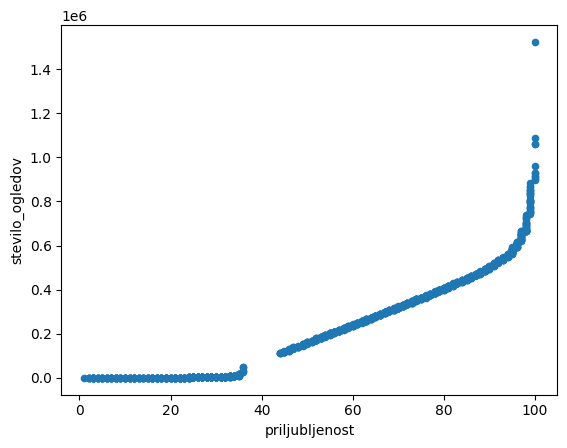

In [9]:
vrhovi_po_priljubljenosti.plot(kind='scatter', y ='stevilo_ogledov', x = 'priljubljenost')

V zgornjem grafu vidimo, da s številom ogledov narašča tudi priljubljenost, vendar pa graf ni v celoti linearen. 

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_ogledov'>

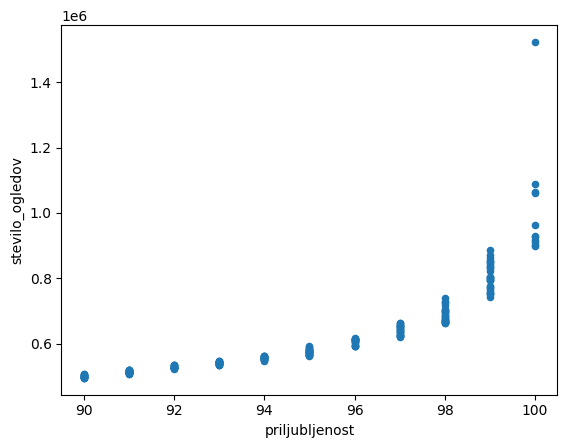

In [30]:
najbolj_priljubljeni = vrhovi_po_priljubljenosti[vrhovi_po_priljubljenosti.priljubljenost >= 90]
srednje_priljubljeni = vrhovi_po_priljubljenosti[(vrhovi_po_priljubljenosti.priljubljenost >= 40) & (vrhovi_po_priljubljenosti.priljubljenost < 90)]
manj_priljubljeni = vrhovi_po_priljubljenosti[vrhovi_po_priljubljenosti.priljubljenost < 40]

najbolj_priljubljeni.plot(kind='scatter', y ='stevilo_ogledov', x = 'priljubljenost')


<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_ogledov'>

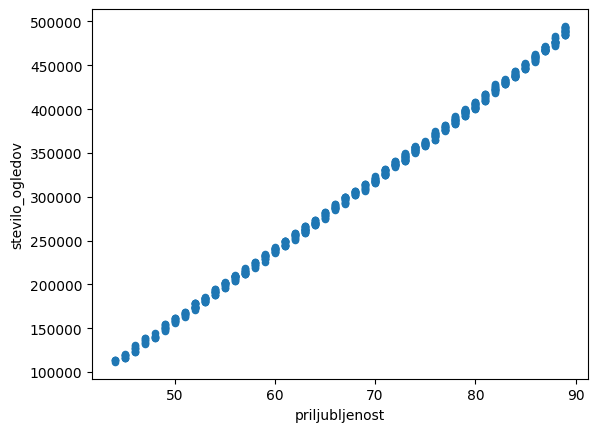

In [31]:
srednje_priljubljeni.plot(kind='scatter', y ='stevilo_ogledov', x = 'priljubljenost')

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_ogledov'>

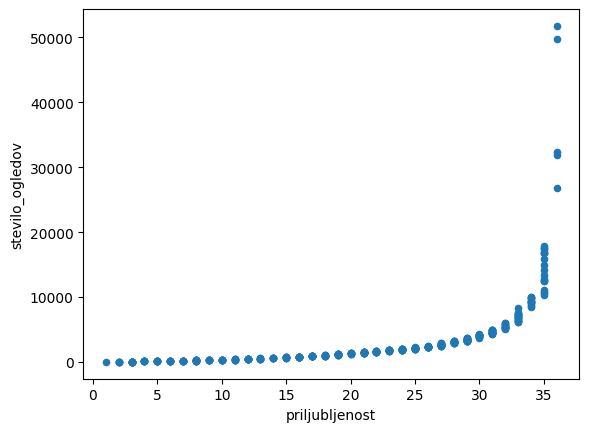

In [32]:
manj_priljubljeni.plot(kind='scatter', y ='stevilo_ogledov', x = 'priljubljenost')

Če se omejimo na priljubljenost med 40 in 90, dobimo linearen gref, kot smo predpostavili.

Pri manjši in večji priljubljenosti pa je graf bolj podoben eksponentni funkciji.

### 2. Povezave med priljubljenostjo in ostalimi zajetimi podatki.

**HIPOTEZA 2**: *V Julijskih Alpah je najvišja povprečna vrednost priljubljenosti, v Prekmurjiu pa najmanjša.* 

**HIPOTEZA 3**: *V Kamniško Savinjskih Alpah je največji delež najbolj priljubljenih (pribljubljenost >= 90) vrhov.* [^1]

**HIPOTEZA 4**: *V Prekmurju je največji delež najmanj priljubljenih (priljubljnost <= 40) vrhov.*

[^1]: To hipotezo sem postavila na podlagi tega, da je v Julijskih Alpah veliko vrhov, do katerih ne vodi nobena **označena** pot (npr. velik del Martuljške skupine). Takšni vrhovi pa so verjetno v splošnem nekoliko manj priljubljeni.

In [10]:
tabela_vrhov.groupby('gorovje')['ime'].count().sort_values()

gorovje
Prekmurje                                         34
Strojna, Košenjak, Kozjak in Slovenske gorice     42
Pohorje, Dravinjske gorice in Haloze              46
Polhograjsko hribovje in Ljubljana                64
Škofjeloško, Cerkljansko hribovje in Jelovica     82
Kamniško Savinjske Alpe                          146
Posavsko hribovje in Dolenjska                   169
Karavanke                                        207
Goriško, Notranjsko in Snežniško hribovje        208
Julijske Alpe                                    324
Name: ime, dtype: int64

In [11]:
povprečne_vrednosti_po_gorovjih = hribi.groupby('gorovje').mean()
povprečne_vrednosti_po_gorovjih.sort_values(['priljubljenost', 'stevilo_ogledov'], ascending=[False, False])

C:\Users\FMF\AppData\Local\Temp\ipykernel_3716\2463658646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  povprečne_vrednosti_po_gorovjih = hribi.groupby('gorovje').mean()


,visina,stevilo_ogledov,priljubljenost,stevilo_poti
gorovje,,,,
Kamniško Savinjske Alpe,1373.656028,350052.719858,68.843972,4.134752
Julijske Alpe,1646.496466,334427.902827,68.116608,2.770318
Polhograjsko hribovje in Ljubljana,629.505618,272155.213483,60.831461,3.977528
"Goriško, Notranjsko in Snežniško hribovje",771.604096,236492.126280,57.010239,2.778157
Karavanke,1304.564738,234840.479339,54.374656,3.217631
Posavsko hribovje in Dolenjska,674.278261,208399.426087,51.878261,3.086957
"Škofjeloško, Cerkljansko hribovje in Jelovica",954.187500,207097.361111,51.409722,4.263889
"Pohorje, Dravinjske gorice in Haloze",921.625000,151035.791667,37.625000,3.083333
"Strojna, Košenjak, Kozjak in Slovenske gorice",597.133333,78549.973333,27.866667,2.853333


Glede na povprečno priljubljenost lahko ocenimo, da so najbolj priljubljene Kamniško Savinjske Alpe in Julijske Alpe. Najmanj je priljubljeno Prekmurje. Hipoteza 2 drži.

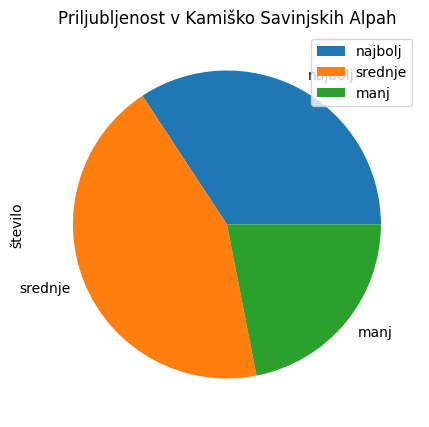

In [44]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Kamniško Savinjske Alpe'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Kamniško Savinjske Alpe'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Kamniško Savinjske Alpe'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Kamiško Savinjskih Alpah')

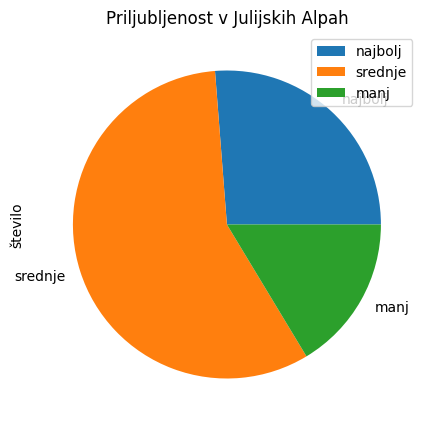

In [47]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Julijske Alpe'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Julijske Alpe'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Julijske Alpe'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Julijskih Alpah')

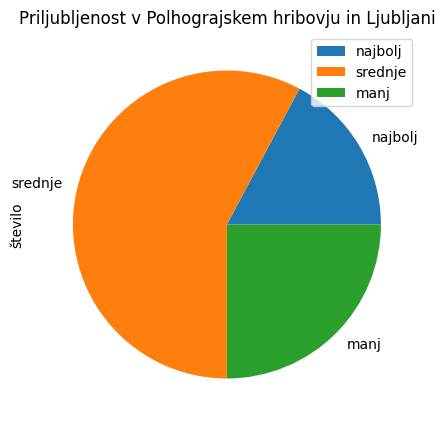

In [46]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Polhograjsko hribovje in Ljubljana'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Polhograjsko hribovje in Ljubljana'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Polhograjsko hribovje in Ljubljana'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Polhograjskem hribovju in Ljubljani')

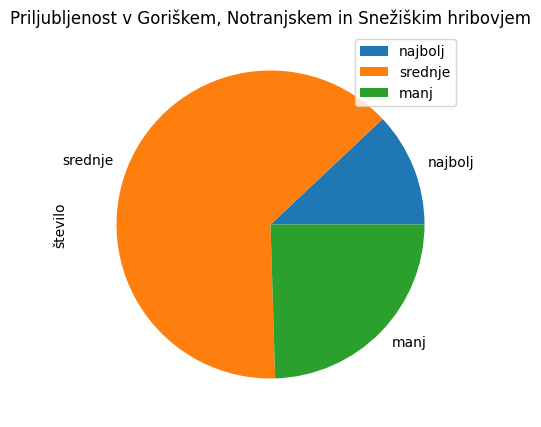

In [48]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Goriško, Notranjsko in Snežniško hribovje'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Goriško, Notranjsko in Snežniško hribovje'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Goriško, Notranjsko in Snežniško hribovje'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Goriškem, Notranjskem in Snežiškim hribovjem')

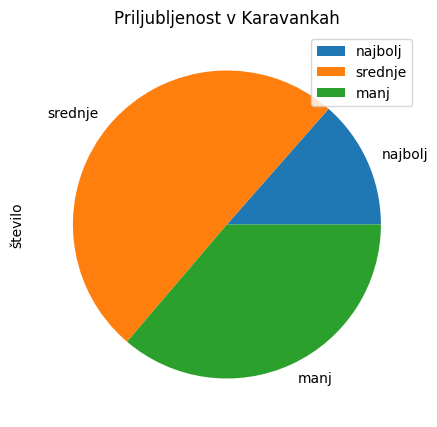

In [49]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Karavanke'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Karavanke'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Karavanke'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Karavankah')

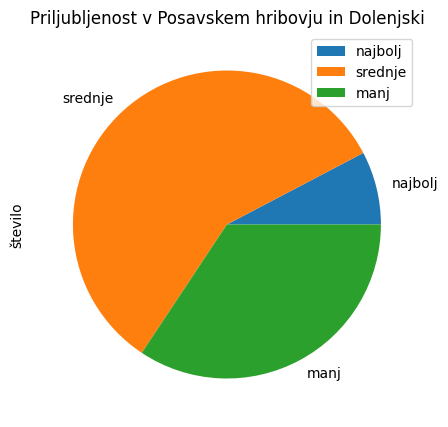

In [51]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Posavsko hribovje in Dolenjska'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Posavsko hribovje in Dolenjska'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Posavsko hribovje in Dolenjska'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Posavskem hribovju in Dolenjski')

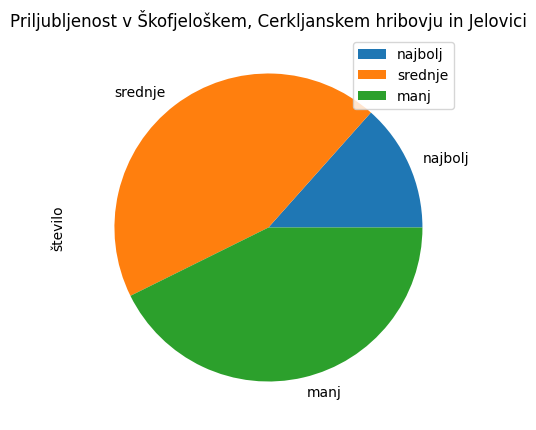

In [52]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Škofjeloško, Cerkljansko hribovje in Jelovica'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Škofjeloško, Cerkljansko hribovje in Jelovica'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Škofjeloško, Cerkljansko hribovje in Jelovica'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Škofjeloškem, Cerkljanskem hribovju in Jelovici')

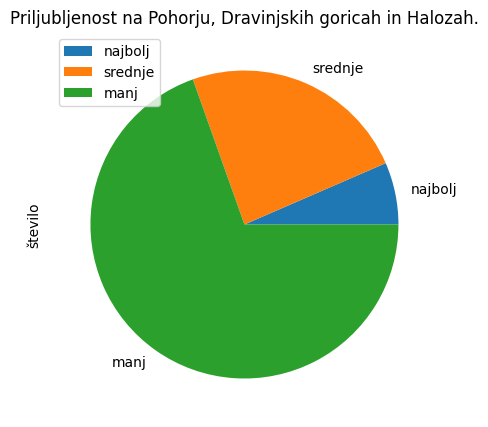

In [53]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Pohorje, Dravinjske gorice in Haloze'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Pohorje, Dravinjske gorice in Haloze'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Pohorje, Dravinjske gorice in Haloze'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost na Pohorju, Dravinjskih goricah in Halozah.')

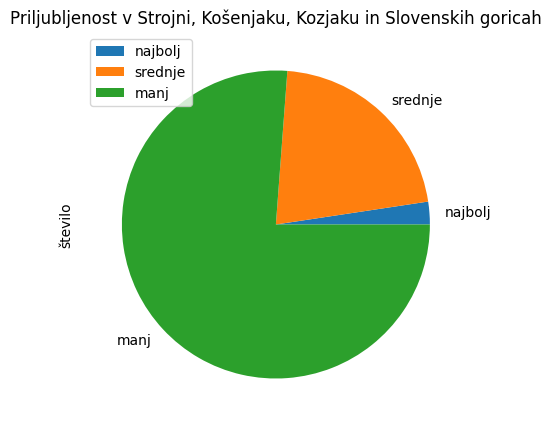

In [54]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Strojna, Košenjak, Kozjak in Slovenske gorice'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Strojna, Košenjak, Kozjak in Slovenske gorice'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Strojna, Košenjak, Kozjak in Slovenske gorice'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Strojni, Košenjaku, Kozjaku in Slovenskih goricah')

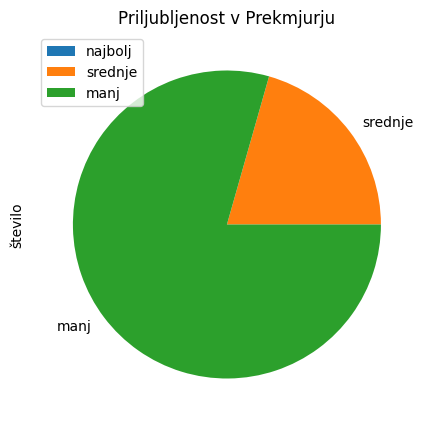

In [55]:
st_najbolj_priljubljenih = len(najbolj_priljubljeni[najbolj_priljubljeni.gorovje == 'Prekmurje'])
st_srednje_priljubljenih = len(srednje_priljubljeni[srednje_priljubljeni.gorovje == 'Prekmurje'])
st_manj_priljubljenih = len(manj_priljubljeni[manj_priljubljeni.gorovje == 'Prekmurje'])

diagram = pd.DataFrame({'število' : [st_najbolj_priljubljenih, st_srednje_priljubljenih, st_manj_priljubljenih]},
                                    index=['najbolj', 'srednje', 'manj'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Priljubljenost v Prekmjurju')

Vidimo, da je največji delež najbolj priljubljenih vrhov v Kamniško Savinjskih Alpah, le malo manj pa v Julijskih Alpah. Torej hipoteza 3 ne drži popolnoma. Res pa je v Prekmurju največji delež manj priljubljenih vrhov.

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_poti'>

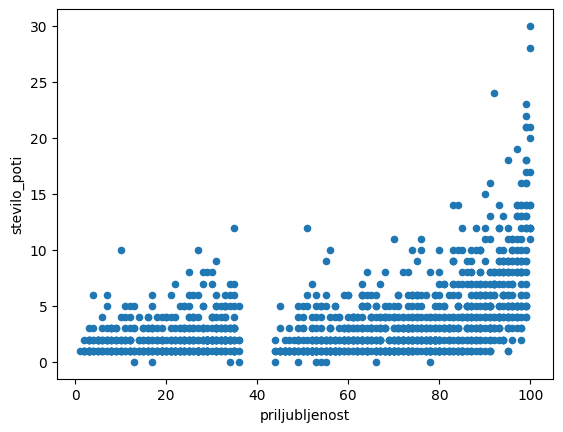

In [20]:
vrhovi_po_priljubljenosti.plot(kind='scatter', y ='stevilo_poti', x = 'priljubljenost')

In [12]:
najbolj_priljubljeni = tabela_vrhov[tabela_vrhov.priljubljenost >= 90]
najbolj_priljubljeni.sort_values('stevilo_ogledov', ascending=False)

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis
293,Triglav,Slovenija,NaN,NaN,Julijske Alpe,2864,"vrh, bivak",1523369,100,28,"Triglav je 2864 m visoka gora, ki se nahaja v ..."
859,Grintovec,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2558,vrh,1087790,100,14,Grintovec je najvišji vrh Kamniških in Savinjs...
877,Storžič,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2132,vrh,1062658,100,30,"Storžič je 2132 m visoka gora, ki se nahaja na..."
1141,Stol,Avstrija,NaN,Slovenija,Karavanke,2236,vrh,1060769,100,20,Stol je z višino 2236 m najvišji vrh Karavank....
1157,Begunjščica,Slovenija,NaN,NaN,Karavanke,2060,vrh,963090,100,14,Begunjščica je pogorje v Karavankah vzhodno od...
...,...,...,...,...,...,...,...,...,...,...,...
27,Grmada (Nanos),Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1209,vrh,497035,90,7,"Grmada je 1209 m visok vrh, ki se nahaja sever..."
448,Vrh nad Škrbino,Slovenija,NaN,NaN,Julijske Alpe,2054,vrh,496518,90,12,Vrh nad Škrbino je najvzhodnejši dvatisočak v ...
380,Velika Zelnarica,Slovenija,NaN,NaN,Julijske Alpe,2320,vrh,495773,90,4,"Velika Zelnarica je 2320 m visok vrh, ki se na..."
623,Lajnar,Slovenija,NaN,NaN,Julijske Alpe,1549,vrh,495175,90,5,"Lajnar je 1549 m visoka gora, ki se nahaja sev..."


In [17]:
min(najbolj_priljubljeni['stevilo_poti'])

1

In [18]:
max(najbolj_priljubljeni['stevilo_poti'])

30

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_poti'>

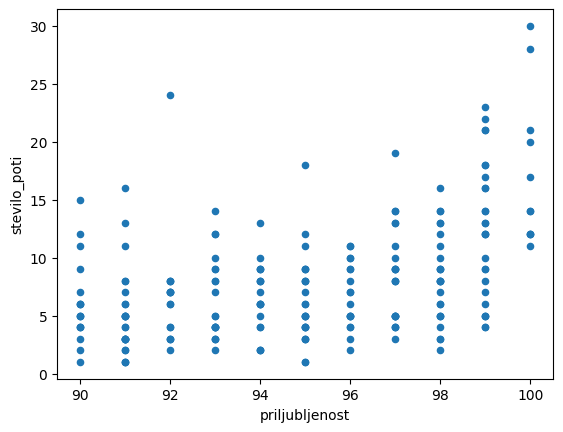

In [19]:
najbolj_priljubljeni.plot(kind='scatter', y ='stevilo_poti', x = 'priljubljenost')

Vidimo, da med najbolj pribljubljenimi vrhovi število poti ne vpliva bistveno na priljubljenost, saj je graf precej razpršen. Opazimo lahko le, da imajo vrhovi, ki imajo priljubljenost 100, vsaj 10 različnih poti.  

In [14]:
min(najbolj_priljubljeni['visina'])

394

In [18]:
najbolj_priljubljeni.mean()

C:\Users\FMF\AppData\Local\Temp\ipykernel_22364\2920935612.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  najbolj_priljubljeni.mean()


visina               1781.440529
stevilo_ogledov    625373.726872
priljubljenost         95.026432
stevilo_poti            7.951542
dtype: float64

Opazimo, da so med najbolj priljubljenimi vrhovi gore iz Julijskih Alp, Karavank in Kamniško Savinjskih Alp. Vsi imajo vsaj 11 različnih poti in vsi so višji od 1666 m.

In [18]:
min(tabela_vrhov['priljubljenost'])

1

In [19]:
najmanj_priljubljeni = tabela_vrhov[tabela_vrhov.priljubljenost <= 10]
najmanj_priljubljeni.sort_values('priljubljenost', ascending=False)

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis
2181,Sveti Duh (Stara Gora),Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",262,"vrh, koča, cerkev",322,10,2,Stara Gora je naselje v občini Sveti Jurij ob ...
1934,Gorički breg,Slovenija,NaN,NaN,Prekmurje,362,vrh,321,10,1,"Gorički breg je razgleden hrib, na katerem se ..."
2173,Norički vrh,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",303,vrh,348,10,1,Norički vrh je deloma travnat in razgleden vrh...
585,Na Glavi,Slovenija,NaN,NaN,Julijske Alpe,1666,vrh,324,10,1,Na Glavi ali Na Glavah je 1666 metrov visok vr...
610,Brinova glava,Slovenija,NaN,NaN,Julijske Alpe,1586,vrh,319,10,1,Brinova glava je manj obiskan vrh nad dolino V...
...,...,...,...,...,...,...,...,...,...,...,...
1578,Golika,Slovenija,NaN,NaN,"Pohorje, Dravinjske gorice in Haloze",609,"vrh, cerkev",50,2,1,Golika je 609 metrov visok vrh na Brinjevi gor...
2172,Ostragova,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",309,vrh,49,2,1,Ostragova je hrib nad naseljem Drbetinci in je...
1583,Sveti Martin (Zlakova),Slovenija,NaN,NaN,"Pohorje, Dravinjske gorice in Haloze",589,"vrh, cerkev",29,2,1,Cerkev sv. Martina se nahaja na razgledni vzpe...
176,Mali Mošenik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",700,vrh,36,2,1,"Mali Mošenik je razgledni vrh, ki se pne na me..."


In [20]:
min(najmanj_priljubljeni['visina'])

262

In [21]:
max(najmanj_priljubljeni['visina'])

1968

Noben vrh nad 2000 m ni med najmanj priljubljenimi.

In [22]:
min(najmanj_priljubljeni['stevilo_poti'])

1

In [23]:
max(najmanj_priljubljeni['stevilo_poti'])

10

<AxesSubplot: xlabel='visina', ylabel='priljubljenost'>

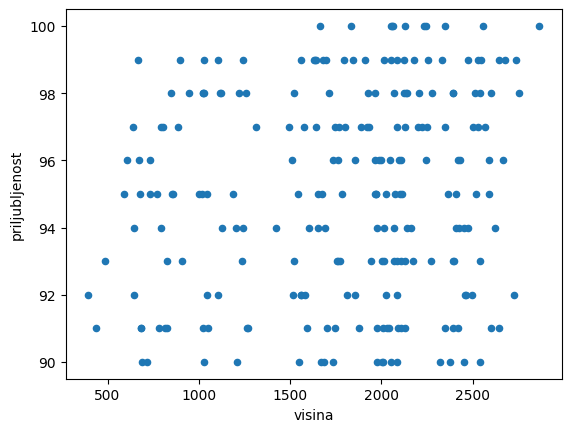

In [24]:
najbolj_priljubljeni_nizki = najbolj_priljubljeni[najbolj_priljubljeni.visina < 2000].sort_values('priljubljenost', ascending=False)
najbolj_priljubljeni.sort_values('priljubljenost', ascending= False).plot(kind='scatter', x = 'visina', y = 'priljubljenost')

<AxesSubplot: xlabel='visina', ylabel='priljubljenost'>

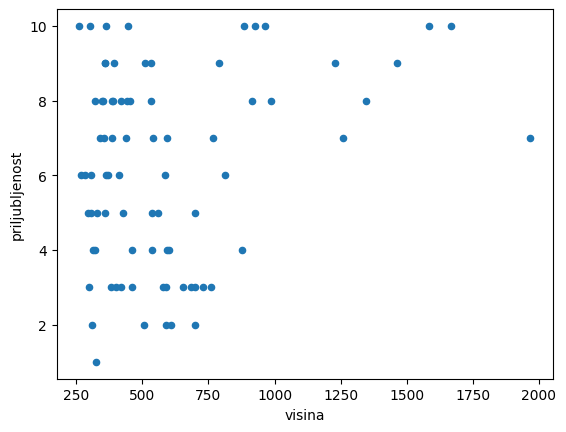

In [25]:
najmanj_priljubljeni.sort_values('priljubljenost', ascending= False).plot(kind='scatter', x = 'visina', y = 'priljubljenost')

Večje povezave med priljubljenostjo in višino ni opaziti. 


<AxesSubplot: xlabel='stevilo_poti', ylabel='priljubljenost'>

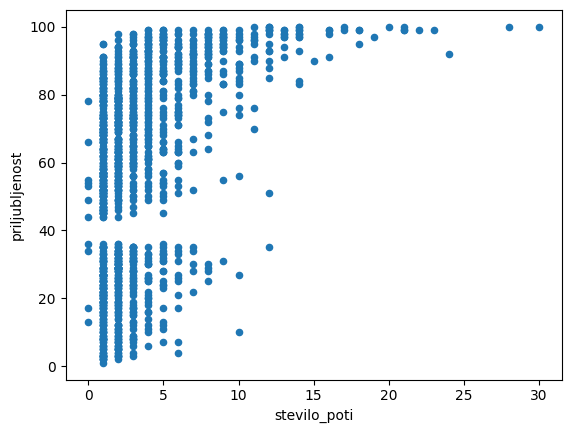

In [26]:
tabela_vrhov.sort_values('priljubljenost', ascending=False).plot(kind='scatter', x = 'stevilo_poti', y = 'priljubljenost')

Razberemo lahko, da imajo vrhovi z več kot 15 potmi tudi visoko priljubljenost. Ni pa nujno, da malo poti pomeni nizko priljubljenost.

In [37]:
hribi[(hribi.stevilo_poti == 1)  & (hribi.visina >= 2000)]

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis
299,Vrh Brda / Cima Verde,Italija,NaN,NaN,Julijske Alpe,2661,vrh,451086,85,1,"Vrh Brda/Cima Verde je 2661 m visok vrh, ki se..."
303,Velika Martuljška Ponca,Slovenija,NaN,NaN,Julijske Alpe,2602,vrh,507138,91,1,Velika Martuljška Ponca se nahaja v osrčju Mar...
307,Mali Kanin,Italija,NaN,Slovenija,Julijske Alpe,2571,vrh,448727,85,1,Mali Kanin je sosednja gora bolj znanega Visok...
311,Rogljica,Slovenija,NaN,NaN,Julijske Alpe,2547,vrh,400475,80,1,Rogljica je malo znana in še manj obiskana gor...
315,Kredarica,Slovenija,NaN,NaN,Julijske Alpe,2541,vrh,32360,36,1,"Kredarica je 2541 metrov visok razgleden vrh, ..."
322,Mala Martuljška Ponca,Slovenija,NaN,NaN,Julijske Alpe,2501,vrh,427439,82,1,"Mala Martuljška Ponca je 2501 m visoka gora, k..."
324,Spodnji Rokav,Slovenija,NaN,NaN,Julijske Alpe,2500,vrh,343323,73,1,"Spodnji Rokav, ki pričenja Rokavsko skupino in..."
326,Široka peč,Slovenija,NaN,NaN,Julijske Alpe,2497,vrh,451923,85,1,"Široka peč je 2497 m visoka gora, ki se nahaja..."
331,Mišeljski Konec,Slovenija,NaN,NaN,Julijske Alpe,2464,vrh,437011,84,1,Mišeljski konec je najvišji vrh Mišeljskega gr...
334,Vrh Laške Planje,Italija,NaN,Slovenija,Julijske Alpe,2448,vrh,552,13,1,Vrh Laške Planje (Lasca Plagna) je 2448 metrov...
